# Project 4: Wrangle and Analyze Data
In this project, i will need to gather data from variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

**Topic** 
[WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10.
The numerators almost always greater than 10. It has over 4 million followers and has received international media coverage.
The goal of this project is to create interesting and trustworthy analyses and visualizatons based on the data gather from WeRateDogs.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import os

## For section to use Tweepy library to query the Twitter API for each tweet's JSON
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1 Data Wrangling
This section includes the following steps:
- Gathering data 
- Assessing data (detect and document at least 8 quality issues and 2 tidiness issues)
- Cleaning data

## 1.1 Gathering Data
Data collected in this project includes:
1. WeRateDogs twitter archive: twitter_archieve_enhanced.csv
2. Tweet image predictions - breed of dog: image_predictions.tsv
3. Each tweet's retweet count and favourite ("like") count at min

### 1.1.1 WeRateDogs

In [2]:
# Read csv file into DataFrame
twitter_archive = pd.read_csv('./data/twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.1.2 Image of dog
The file `image_predictions.tsv`, record the prediction the breed of dog that is present in each tweet. It was hosted on Udacity's servers with the url shown in below code cell, which will be downloaded programmatically usign the `Requests` library.

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

In [7]:
# Open file and write contents of the response vairable to it

with open('./data/image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [8]:
# Check if it execute successfully
os.listdir('./data')

['twitter-archive-enhanced.csv', '.DS_Store', 'image_predictions.tsv']

In [3]:
image = pd.read_csv('./data/image_predictions.tsv', sep='\t')
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 1.1.3 Additional information
Additional information like tweet's retweet count and favorite ("like") count and any additional interesting data will be gather by querying the **Twitter API** with the tweet IDs from `twitter_archive` dataframe, using Python's [Tweepy](https://www.tweepy.org/) library and store each tweet's entire set of JSON data in `tweet_json.txt`. 
Twitter API

In [3]:
# Install tweepy
#pip install tweepy

  Using cached https://files.pythonhosted.org/packages/bb/7c/99d51f80f3b77b107ebae2634108717362c059a41384a1810d13e2429a81/tweepy-3.9.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
# API Keys, Secrets and Tokens
consumer_key = "YOUR CONSUMER KEY"
consumer_secret = "YOUR CONSUMER SECRET"
access_token = "YOUR ACCESS TOKEN"
access_secret = "YOUR ACCESS SECRET"

The following code, which is provided in the [Getting started](https://buildmedia.readthedocs.org/media/pdf/tweepy/latest/tweepy.pdf) portion of the Tweepy documentation, will create an API object that you can use to gather Twitter data.

In [141]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

The `tweepy` library uses `tweepy.get_status()` to access specific tweets by their id.
```
tweet = api.get_status(id_of_tweet)
print(tweet.text)
```
Describe in [StackOverflow answer](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id)   
[Reading and Writing JSON to a file in python](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)

In [142]:
# Store the tweet_id in twetter_archive dataframe in tweet_ids
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

### DO NOT run below cell code, as this notebook does not include the API keys, secret, token needed

In [143]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('./data/tweet_json_SAMPLE.txt', 'w') as outfile:
    # This loop will likely take 20-30 min to run 
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended',
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
        
end = timer()
print('Entire query twitter data take {} min'.format(
        (end - start)/60))
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 134


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 136


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

Explore the content in `tweet_json.txt`

In [140]:
temp_list = []
# Check the contents of the tweet_json.txt by reading the first tweet
with open('./data/tweet_json.txt', 'r') as json_file:
    first_line = json_file.readline()
    first_data = json.loads(first_line)

# list all the keys
first_data.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [141]:
# check what is info available under 'user''s key
first_data['user']

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'merch ➜',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/N7sNNHSfPq',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8890554,
 'friends_count': 18,
 'listed_count': 6005,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145935,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13052,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/them

Read the `tweet_json.txt` file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [4]:
# Collect all selected attributes
selected_attr = []

with open('./data/tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        selected_attr.append({
            'tweet_id': json_data['id_str'],
            'favorites': json_data['favorite_count'],
            'retweet_count': json_data['retweet_count'],
            'user_id': json_data['user']['id_str'],
            'followers_count': json_data['user']['followers_count'],
            'friends_count': json_data['user']['friends_count'],
            'favourites_count': json_data['user']['favourites_count'],
            'statuses_count': json_data['user']['statuses_count'],
            'join_date': json_data['user']['created_at']
        })

In [5]:
# Save all selected attributes in another dataframe
twitter_add = pd.DataFrame(selected_attr, columns = [
    'tweet_id', 'favorites','retweet_count','user_id', 'followers_count',
    'friends_count', 'favourites_count', 'statuses_count', 'join_date'
])

twitter_add.head()

,tweet_id,favorites,retweet_count,user_id,followers_count,friends_count,favourites_count,statuses_count,join_date
0,892420643555336193,35417,7481,4196983835,8890554,18,145935,13052,Sun Nov 15 21:41:29 +0000 2015
1,892177421306343426,30642,5550,4196983835,8890554,18,145935,13052,Sun Nov 15 21:41:29 +0000 2015
2,891815181378084864,23050,3674,4196983835,8890554,18,145935,13052,Sun Nov 15 21:41:29 +0000 2015
3,891689557279858688,38689,7648,4196983835,8890554,18,145935,13052,Sun Nov 15 21:41:29 +0000 2015
4,891327558926688256,36947,8258,4196983835,8890554,18,145935,13052,Sun Nov 15 21:41:29 +0000 2015


## 1.2 Access
After obtaining all the data, this section is to assess them to detect any quality and tidiness issues.   
At least 8 quaity issues and 2 tidiness issues are detected. 

### 1.2.1 `twitter_archive` table

In [6]:
print(f'Shape of twitter_archive : {twitter_archive.shape}')
twitter_archive.head(2)

Shape of twitter_archive : (2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Data dictionary   
|**No**| **Colume's name** |**Descriptions**|
|:----:|:------------------|:---------------|
|01|created_at|UTC time when this Tweet was created|
|02|id|Unique identifier for this tweet|
|03|source|Utility used to post the tweet, as an html-formatted string|
|04|in_reply_to_status_id|Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's ID|
|05|in_reply_to_user_id|Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's author ID|
|06|Coordinates|Nullable. Represents the geographic location of this Tweet as reported by the user or client application. The inner coordinates array is formatted as `geoJSON`(longitude first, then latitude)|
|07|retweeted_status|Users can amplify the broadcast of Tweets authored by other users by retweeting. Retweets can be distinguished from typical Tweets by the existence of a contains a representation of the original Tweet that was retweeted. Note that retweets of retweets do not show representations of the intermediary retweet, but only the original Tweet|
|08|expanded_url|An expanded version of display_url. Links ot the media display page|
|09|reply_count|Number of times this Tweet has been replied|
|10|retweet_count|Number of times this Tweet has been retweeted|
|11|favorite_count|Nullable. Indicates approximately how many times this Tweet has been **liked** by Tweitter users. This is name as `favorites` in the dataframe|
|12|entities|Entities which have been parsed out the text of the Tweet|
|13|favourites_count|Number of Tweets this user has liked in the account's lifetime. This is under the `user` key|
|14|statuses_count|Number of Tweets (including retweets) issued by the user|
|15|duggo|A big pupper, usually older. This label does not stop a doggo from behaving lke a pupper|
|16|pupper|A small doggo, usually younger. Can be equally, if not more mature than some doggos|
|17|puppo|A transitional phase between pupper and doggo. Easily understood as the dog equivalent to a teenager|
|18|floof|Any dog really. However, this label is commonlly given to dogs with seemingly excess fur. Comical amounts of fur on a dog will certainly earn the dog this generic name|

[Link](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/entities-object#:~:text=Entities%20provide%20metadata%20and%20additional,Twitter%20polls%2C%20and%20attached%20media.)

In [14]:
# List of datatype and null value of all columns
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# Statistical description of numeric column
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [16]:
# There is one with '0' as denominator, 
# to impute with most frequent denominator value ('10') in cleaning section
twitter_archive.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [17]:
# There are two row with 0 rating (numerator)
# To refer back to the tweet text to check the rating
twitter_archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


Based on the text from the tweet text, the 2 are truely with 0 rating

In [6]:
# Tweet text on first tweet wiht 0 rating
twitter_archive.loc[315, 'text']

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [19]:
# Tweet text on first tweet wiht 0 rating
twitter_archive.loc[1016, 'text']

"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"

Some of the entry in the `name` is not dog's name

In [6]:
twitter_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

### 1.2.2 `twitter_add` table
It was observed that, there is only **one** user_id, and thus, all information under the **user**, i.e. followers_count, friends_count, favourites_count, statuses_count are the same

In [20]:
# Only ONE user's id
twitter_add.user_id.unique()

array(['4196983835'], dtype=object)

In [21]:
twitter_add.describe()

,favorites,retweet_count,followers_count,friends_count,favourites_count,statuses_count
count,2331.000000,2331.000000,2.331000e+03,2331.0,2331.000000,2331.0
mean,7398.338052,2630.226083,8.890576e+06,18.0,145934.991849,13052.0
std,11490.609017,4448.620737,6.095120e+01,0.0,0.089934,0.0
min,0.000000,1.000000,8.889918e+06,18.0,145934.000000,13052.0
25%,1286.000000,534.000000,8.890563e+06,18.0,145935.000000,13052.0
50%,3209.000000,1229.000000,8.890577e+06,18.0,145935.000000,13052.0
75%,9055.000000,3051.000000,8.890598e+06,18.0,145935.000000,13052.0
max,152629.000000,75580.000000,8.890610e+06,18.0,145935.000000,13052.0


### 1.2.3 Image of dog
Out of 2356 rows in twitter_archive, there is only 2075 rows with image of dog dataframe.

In [22]:
print(f'Shape of image : {image.shape}')
image.head(2)

Shape of image : (2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [23]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# Majority of the dog prediction with high confidence level is from p1
# Majority of tweet with 1 image
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
# There is non-dog breed prediction in p1 prediction, 
# thus, need to perform cleaning to extract all dog breed prediction
image.p1_dog.unique()

array([ True, False])

In [26]:
# Inconsistency in the dog breed, some with capitalize, some with all small capital
image.query('p1_dog == True').p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

### Quality
`twitter_archive` **table**
1. timestamp is in str format, not datetime format.
2. source is in html formtted string, instead of the name of the utility used to post the tweet
3. Rating related column with incorrectly extracted values. Firstly, rating denomerator with min value of 0. Some of the ratings with decimal values were incorrectly extracted as well. The current pipeline captures incorrect valus when rating numerators contain decimals. 
4. Remove all retweet.
5. Remove tweet with no image.
6. Dog names not corrected. There are several values that are not dog names, like 'a', 'the', 'such', etc. 
7. All id shall be in str format instead of numeric format, as it doesn't have numeric meaning

`image` **table** 
8. Remove the row with non-breed prediction (that is all false for p1, p2, & p3). In addition, record only ONE breed/type, based on the highest confidence level prediciton.
9. In-consistence in dog breed structure. Some with capitalized, some with all lower letters. To capitalize all dog breeed.

`twitter_add` **table**
11. Drop all user's related column, as all are refered to only **ONE single user**, which is unable to first verify the accuracy of the data, and second, no value added to the analysis if all rows with same data.


### Tidiness
`twitter_archive` **table**
1. There are 4 columns to state the dog stage (doggo, floofer, pupper, puppo). It should be a single column instead. Thus, to cosolidate the four dog stages column into single column as dog_stage.
`twitter_archieve_master` **clean table**
2. Information about one type of observational unit (tweets) is spread across three different datasets (`twitter_archive`,`image`, and `twitter_add`). Therefore, these three datasets should be merged into single dataset, as they are part of the same observational unit. The merged dataset was saved into new dataframe, named `twitter_archieve_master`.
3. Drop unwanted column (column with null value), and create a new column for the dog rating.   

## 1.3 Clean

In [7]:
# create a new copy of dataframe for cleaning
twitter_clean = twitter_archive.copy()
image_clean = image.copy()
twitter_add_clean = twitter_add.copy()

### 1.3.1 Timestamp
`twitter_archive`   
**Define**   
- timestamp is in str format, to convert it to datetime format. (This is quality issue)   

**Code**

In [8]:
# convert timesteamp str datatype to datetime datatype
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

**Test**

In [9]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### 1.3.2 source column
`twitter_archive` table   
**Define**   
`source` is in html formtted string, instead of the name of the utility used to post the tweet. 
```
'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
```
To extract the utility, i.e. *Twitter for iPhone* as shown in above example

**Code**

In [10]:
twitter_clean['source'] = twitter_clean.source.str.extract(r'rel="nofollow">(.*)<')


**Test**

In [11]:
twitter_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### 1.3.3 rating related column with incorrectly extracted values
`twitter_archive` table   
**Define**   
- There is one rating denomerator with the value of 0. To check the text content.
Suspected this could be an error and to find out the correct rating if any from the tweet's content.   
- In additions, some of the ratings with decimal values are incorrectly extracted as well. The current pipeline captures incorrect valus when rating numerators contain decimals.   
- As such, to extract the ratings directly from the `text` column instead.

**Code**

Tools such as [this one](https://regex101.com/) shared by the course's reviewer is helpful in finding the correct regex.

In [12]:
# Extract the numerators (with decimal) and 
# denominators (with decimal) from the text column, save in new dataframe, ratings

ratings = twitter_clean.text.str.extract('(\d+\.?\d+|\d+)\/(\d+\.?\d+|\d+)', 
                               expand=True)
ratings.rename(columns = {0:'numerator', 1:'denominator'}, inplace = True)
ratings

,numerator,denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [13]:
# change data type to float
ratings['numerator'] = ratings['numerator'].astype('float')
ratings['denominator'] = ratings['denominator'].astype('float')

In [14]:
# Update the ratings value into twitter_clean dataframe
twitter_clean['rating_numerator'] = ratings['numerator']
twitter_clean['rating_denominator'] = ratings['denominator']

To check the rating with `denominator = 0`

In [15]:
twitter_clean.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960.0,0.0,None,None,None,None,None


The row with rating_denominator = 0 is **313** as shown above.
I check the content of the tweet and found out that the valid rating 
should be **13/10** instead of 960/00

In [16]:
twitter_clean.loc[313,'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [17]:
# change from 960 to 13 for the rating numerator
twitter_clean.loc[313,'rating_numerator'] = 13.0

# change from 00 to 10 for the rating denominator
twitter_clean.loc[313,'rating_denominator'] = 10.0

**Not dog rating**   
It was found out during the analysis that, there is one none dog rating. Refer to code cell below for its' tweet text. The 24/7 means day and night, not rating. There is no rating information in the text. Thus, to drop this row instead.

In [18]:
twitter_clean.query('rating_numerator == 24')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None


In [19]:
twitter_clean.loc[516,'text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [20]:
twitter_clean.drop(516, axis = 0, inplace = True)

**Test**   
- There is no `rating_denominator` =0  
- There is no `rating_numerator` = 24
- Observed very high max value in rating_numerator. To check the validity of the data by referring to its' `text` column. Results showed that it was indeed correct.

In [21]:
twitter_clean[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2355.000000,2355.000000
mean,12.656913,10.461146
std,41.484658,6.742855
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [22]:
# no not dog rating's row
twitter_clean.query('rating_numerator == 24')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
# to validate the accuracy with rating_numerator = 1776
twitter_clean.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,None,None,None


In [24]:
twitter_clean.loc[979,'text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

### 1.3.4 remove all retweet
`twitter_archive` table   
**Define**   
As I only interested in the original ratings (no retweets) that have images, thus I need to remove all retweets in the dataset.   
For this, 
- remove all rows that `retweeted_status_id` is not null (indicated as retweet)
- remove all rows that `in_reply_to_status_id` is not null (indicated is a reply)

**Code**

In [25]:
# Retrieve only original tweets, i.e. retweeted_status_id is Null
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.in_reply_to_status_id.isnull()]

# Reset index
twitter_clean.reset_index(drop = True, inplace = True)

**Test**

In [26]:
twitter_clean.retweeted_status_id.unique()

array([nan])

In [27]:
twitter_clean.in_reply_to_status_id.unique()

array([nan])

### 1.3.5 Remove tweet that has no image
`twitter_archive` table   
**Define**   
Remove all tweets that do not have images, that is remove all row in column `expanded_urls` that is null

**Code**

In [28]:
twitter_clean = twitter_clean[twitter_clean.expanded_urls.notnull()]

# Reset index
twitter_clean.reset_index(drop = True, inplace = True)

twitter_clean.shape

(2093, 17)

**Test**

In [29]:
# Count the row with null value in columns `expanded_urls`
twitter_clean.expanded_urls.isnull().sum()

0

### 1.3.6 Dog names not corrected
`twitter_archive` table   
**Define**   
Dog names not corrected. There are several values that are not dog names, like 'a', 'the', 'such', etc. Notice that all of these observations have lowercase characteris, thus, can use this to differentiated from Dog names and extracted the field for clean up.

**Code**

In [30]:
# mask to extract all lower case 'name'
mask = twitter_clean.name.str.contains('^[a-z]', regex = True)

# display the lower case 'name'
twitter_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [31]:
# list all the row index for lower case 'name'
indices = twitter_clean[mask].name.index.to_list()

# set it to 'None'
twitter_clean.at[indices, 'name'] = 'None'

**Test**

In [32]:
# all in-correct dog name were replaced with None
twitter_clean[mask].name

21      None
51      None
141     None
156     None
263     None
        ... 
2086    None
2087    None
2089    None
2090    None
2091    None
Name: name, Length: 104, dtype: object

### 1.3.7 inappropriate datatype for id column
`twitter_archive` table and `image_prediction` table

**Define**   
All id shall be in str format instead of numeric format, as it doesn't have numeric meaning

**Code**

In [33]:
twitter_clean['tweet_id'] = twitter_clean.tweet_id.astype('str')

image_clean['tweet_id'] = image_clean.tweet_id.astype('str')

**Test**

In [34]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2093 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2093 non-null   datetime64[ns, UTC]
 4   source                      2093 non-null   object             
 5   text                        2093 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2093 non-null   object             
 10  rating_numerator            2093 non-null   float64         

In [35]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 1.3.8 Multiple column with dog stage info (doggo, floofer, pupper, puppo)
`twitter_archive` table   
**Define**   
This is tidyness issue
There are 4 columns to state the dog stage (doggo, floofer, pupper, puppo) and also none type. To combine all into single column as dog_stage.   
*This is tidiness issue*

**Code**

In [36]:
# replace all 'None' value in these 4 columns with empty string ''
# combine all the value in these 4 columns, (by row)
# check the unique value of the results
twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None','').sum(1).unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

There are some rows with 2 entries within these 4 columns:
1. doggopuppo
2. doogofloofer
3. doggopupper   

Using code cell below, it is able to identify the actual dog stage of that row by the tweet text.
Thus, to compress the cell into single column, name as 'dog_stage' and manual clean up those row with multiple dog stage

In [37]:
# check row with 'doggopuppo'. Based on the text, the dog stage should be puppo instead of doggo
twitter_clean.query('doggo == "doggo" and puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
154,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13.0,10.0,None,doggo,None,None,puppo


In [38]:
twitter_clean.loc[154,'text']

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [39]:
#create new column to list the dog stage by row
twitter_clean['dog_stage'] = twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None','').sum(1)


# drop unwanted column: 'doggo', 'floofer', 'pupper', 'puppo'
twitter_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)


Manual clean up for `doggopuppo`

In [40]:
twitter_clean.at[154,'dog_stage'] = 'puppo'

Manual clean up for `doogofloofer`

In [41]:
twitter_clean.loc[twitter_clean.query('dog_stage == "doggofloofer"').index.to_list()[0],'text']

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [42]:
twitter_clean.loc[twitter_clean.query('dog_stage == "doggofloofer"').index.to_list()[0],'dog_stage'] = 'floofer'

Manual clean up for `doggopupper`

In [43]:
# List out all the row number with dog stage of doggo & pupper
twitter_clean.query('dog_stage == "doggopupper"').index.to_list()

[357, 414, 444, 534, 559, 686, 745, 845, 894]

In [44]:
# This should be doggo
print(twitter_clean.loc[357, 'text'])

# change to doggo
twitter_clean.loc[357,'dog_stage'] = 'doggo'

This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7


In [45]:
# No change, as there are two dogs, one for pupper, one for doggo
twitter_clean.loc[415, 'text']

'This is Cooper. He likes to stick his tongue out at you and then laugh about it. 12/10 quite the jokester https://t.co/O9iGgvfuzl'

In [46]:
# This should be pupper
print(twitter_clean.loc[445, 'text'])

# change to pupper
twitter_clean.loc[445, 'dog_stage'] = 'pupper'

Say hello to Mauve and Murphy. They're rather h*ckin filthy. Preferred nap over bath. Both 12/10 https://t.co/4UwCTW3lXG


In [47]:
# This should be doggo
print(twitter_clean.loc[535, 'text'])

# change to doggo
twitter_clean.loc[535,'dog_stage'] = 'doggo'

This is Dallas. Her tongue is ridiculous. 11/10 h*ckin proud af https://t.co/h4jhlH4EyG


In [48]:
# No change, consist of doggo and pupper
twitter_clean.loc[560, 'text']

'This is Oakley. He just got yelled at for going 46 in a 45. Churlish af. 11/10 would still pet so well https://t.co/xIYsa6LPA4'

In [49]:
# No change, consist of doggo and pupper
twitter_clean.loc[687, 'text']

"This is Emma. She can't believe her last guess didn't hit. Convinced ur stacking them on top of each other. 10/10 https://t.co/JRV1dhBYwu"

In [50]:
# Refer to the tweet reply via the extended_urls, this should be doggo

print(twitter_clean.loc[746, 'text'])

# change to doggon
twitter_clean.loc[746,'dog_stage'] = 'doggo'

This is Max. She has one ear that's always slightly more alert than the other. 10/10 wonky af https://t.co/5eJg69G8vY


In [52]:
# No change, consist of doggo and pupper
twitter_clean.loc[845, 'text']

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [54]:
# No change, consist of doggo and pupper
twitter_clean.loc[894, 'text']

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [55]:
# replace empty string with 'None' value
twitter_clean.dog_stage.replace('','None', inplace = True)

**test**

In [56]:
# There should have 5 doggopupper.
twitter_clean.dog_stage.value_counts()

None           1755
pupper          221
doggo            75
puppo            24
floofer          10
doggopupper       8
Name: dog_stage, dtype: int64

### 1.3.9 Clean up the dog breed/ type prediction
`image` table   

**Define**   
- Remove the row with non-breed prediction (that is all false for p1, p2, & p3). 
- In addition, record only ONE breed/type, based on the highest confidence level prediciton, and save in column `dog_breed`   
*This is Tidiness issue*.

**Code**

In [57]:
# Mask for p1, p2, p3 non dog prediction
mask_1 = image_clean['p1_dog'] == False
mask_2 = image_clean['p2_dog'] == False
mask_3 = image_clean['p3_dog'] == False

In [58]:
# There are total of 324 rows with non dog prediction
image_clean[mask_1 & mask_2 & mask_3]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [59]:
# remove all rows with non dog prediction
image_clean = image_clean[~(mask_1 & mask_2 & mask_3)]

In [60]:
# Loop through each row, and extract the dog breed if it is predicted to be dog,
# starting from p1, then p2, then p3, as it started with the highest confidence level prediction
for idx,row in image_clean.iterrows():
    if row['p1_dog'] == True:
        image_clean.at[idx,'dog_breed'] = row['p1']
        
    elif row['p2_dog'] == True:
        image_clean.at[idx,'dog_breed'] = row['p2']
    
    elif row['p3_dog'] == True:
        image_clean.at[idx,'dog_breed'] = row['p3']
        

In [61]:
# Keep only the wanted column
image_clean = image_clean[['tweet_id','dog_breed']]

**Test**

In [62]:
image_clean.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


### 1.3.10 In-consistence dog breed naming structure
`image` table   

**Define**   
In-consistence in dog breed structure. Some with capitalized, some with all lower letters. To capitalize all dog breed.


**Code**

In [63]:
image_clean['dog_breed'] = [name.capitalize() for name in image_clean.dog_breed]

**Test**

In [64]:
image_clean.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,Redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,Miniature_pinscher


In [65]:
# Export image_clean to csv file
image_clean.to_csv('./output/image_clean.csv', index = False)
twitter_clean.to_csv('./output/twitter_clean.csv', index = False)

### 1.3.11 Drop unwanted column in `twitter_add`
`twitter_add` table   

**Define**   
Drop all user's related column, as all is only referred to ONE single user, which which is unable to first verify the accuracy of the data, and second, no value added to the analysis if all rows with same data.


**Code**

In [66]:
twitter_add_clean.drop(columns = ['user_id', 'followers_count',
       'friends_count', 'favourites_count', 'statuses_count', 'join_date'], inplace = True)

**Test**

In [67]:
twitter_add_clean.head(2)

,tweet_id,favorites,retweet_count
0,892420643555336193,35417,7481
1,892177421306343426,30642,5550


### 1.3.12 Combine three datasets into one
`twitter_add` table   

**Define**   
Information about one type of observational unit (tweets) is spread across three different datasets (`twitter_archieve`,`image_prediction`,`twitter_archieve`). Therefore, these three datasets should be merged into single dataset, as they are part of the same observational unit. The merged dataset was saved into new dataframe, named `twitter_archieve_master`.

*Tidiness issue*

**Code**

In [68]:
# Display number of rows and column for all the 3 tables
print(f'twitter_archieve: {twitter_clean.shape}')
print(f'image_prediction: {image_clean.shape}')
print(f'twitter_add: {twitter_add_clean.shape}')

twitter_archieve: (2093, 14)
image_prediction: (1751, 2)
twitter_add: (2331, 3)


In [69]:
# Merge twitter_archieve with image_prediction
# Inner join to have ONLY rows with predicted dog breed obtained from image_prediction
twitter_archieve_master = twitter_clean.merge(image_clean, how = 'inner', on = 'tweet_id')

# Merge the above with twitter_add
# Inner join, to remove the row without additional info from twitter_add table
twitter_archieve_master = twitter_archieve_master.merge(twitter_add_clean, 
                                                        how = 'inner', on = 'tweet_id')

print(f'twitter_archieve_master: {twitter_archieve_master.shape}')

twitter_archieve_master: (1658, 17)


**Test**

In [70]:
twitter_archieve_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed,favorites,retweet_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,Chihuahua,30642,5550
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,Chihuahua,23050,3674
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,Labrador_retriever,38689,7648
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,Basset,36947,8258
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,Chesapeake_bay_retriever,18620,2761


In [71]:
twitter_archieve_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1658 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1658 non-null   datetime64[ns, UTC]
 4   source                      1658 non-null   object             
 5   text                        1658 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1658 non-null   object             
 10  rating_numerator            1658 non-null   float64         

### 1.3.12 Drop unwanted column, and create a new column for the dog rating
`twitter_archieve_master` table   

**Define**   
Drop unwanted column, i.e. those column with all NULL value (in_reply_to_status_id,
in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id retweeted_status_timestamp).   
*Tidiness issue*

On top of that, I would like to create addition 2 columns for my data analysis:
- Calculated dog rating by rating_numerator/ rating_denominator 
- Day of week of the tweet

**Code**

In [72]:
# Drop unwanted columns
twitter_archieve_master.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id',
        'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                            inplace = True)

In [73]:
# Add a column to calculate the dog rating
twitter_archieve_master['rating'] = twitter_archieve_master['rating_numerator']/twitter_archieve_master['rating_denominator']

In [74]:
# create new column to for day of week

# Monday = 1, Sunday = 7
twitter_archieve_master['tweet_day'] = [x.isoweekday() for x in twitter_archieve_master['timestamp']]
# Change 'tweet_day' data type from int to str
twitter_archieve_master['tweet_day'] = twitter_archieve_master['tweet_day'].replace({1:'Monday', 2:'Tuesday', 
            3:'Wednesday', 4:'Thursday',5:'Friday', 6:'Saturday', 7:'Sunday'})

In [75]:
# Export clean dataframe to csv file
twitter_archieve_master.to_csv('./output/twitter_archieve_master.csv', index = False)

**Test**

In [76]:
# no null value
twitter_archieve_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1658 non-null   object             
 1   timestamp           1658 non-null   datetime64[ns, UTC]
 2   source              1658 non-null   object             
 3   text                1658 non-null   object             
 4   expanded_urls       1658 non-null   object             
 5   rating_numerator    1658 non-null   float64            
 6   rating_denominator  1658 non-null   float64            
 7   name                1658 non-null   object             
 8   dog_stage           1658 non-null   object             
 9   dog_breed           1658 non-null   object             
 10  favorites           1658 non-null   int64              
 11  retweet_count       1658 non-null   int64              
 12  rating              1658 non-null 

# 2 Exploratory Data Analysis and visualization
Analyze and visualize with at least 3 insights and 1 visualization.

**Questions that I would like to answer based on the cleaned data**
1. Which is the common platform user used to push their tweet?
2. How's the rating distribution?
3. Correlation between rating with **like** (favorites) counts
4. Correlation between favorites count and retweet count
5. What dog breed is most popular (averagely having high number of favorites, **like** counts)?
6. The dog'stage distribution and which dog stage is most popular (averagely having high number of likes).
7. What is the day of week with highest number of tweet post?
8. Trend of Rating and favorites count over time
9. Which is the top rate dog?
10. Which is the most popular dog?

### 2.1 Common platform user used to push their tweet
To get the composition of the **source** column.   
Code cell below shows that vast majority (**98.2%**) of user uses **iPhone** to tweet

In [77]:
# create a copy of twitter_archieve_master's dataframe, easier to call in below code cell
df = twitter_archieve_master.copy()

In [78]:
df.source.value_counts(normalize = True)

Twitter for iPhone    0.981906
Twitter Web Client    0.013269
TweetDeck             0.004825
Name: source, dtype: float64

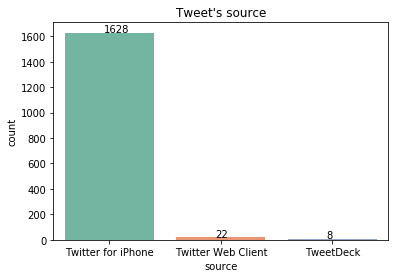

In [79]:
#Visualize the distribution
ax = sns.countplot(x = 'source', data = df,
                   palette="Set2")

#annotate count value on each source
for p, label in zip(ax.patches, df.source.value_counts().values):
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+2.1))
    
ax.set_title("Tweet's source");

### 2.2 Rating distribution
- There are tweet with bad rating, as low as 0. 
- Low percentage (< 25 percentile) is with rating < 1.0.
- Majority of rating is between 1 and 1.2. (25 to 75 percentile).   
- The max rating is 1.4

In [80]:
df.rating.describe()

count    1658.000000
mean        1.080599
std         0.179367
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64

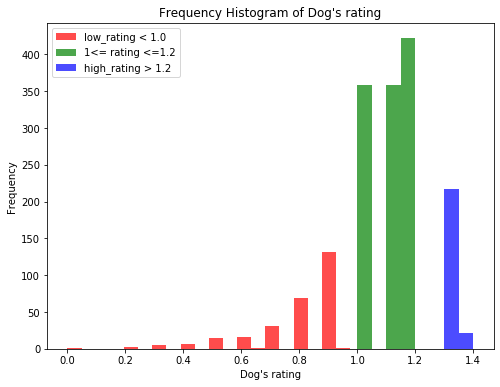

In [81]:
# Divide the rating into 3 category:
# low, medium and high, group as below:
x_low = df.loc[df.rating <=0.99, 'rating']
x_medium = df[(df.rating > 0.99) & (df.rating <=1.2)]['rating']
x_high = df.loc[df.rating >1.2, 'rating']

#kwargs = dict(alpha = 0.8, bins = 15)

# Visualize the dog's rating histogram, with 3 groupings
plt.subplots(figsize = (8,6))
plt.hist(x_low, bins=20, alpha = 0.7, color = 'r', label = 'low_rating < 1.0')
plt.hist(x_medium, bins = 4, alpha = 0.7, color = 'g', label = '1<= rating <=1.2')
plt.hist(x_high, bins=2, alpha = 0.7, color = 'b', label = 'high_rating > 1.2')

plt.gca().set(title = "Frequency Histogram of Dog's rating", ylabel = "Frequency",
              xlabel = "Dog's rating")
plt.legend();

### 2.3 Rating versus favorites count for the tweet
- Weak positive correlation between dog's rating with like (favorites) counts observed, correlation coefficient of around r = 0.4.
- From the scatter plot, it was observed that **low** favorites count observed across all the dog's rating range (0 - 1.4). However, higher rating tends to have relatively **higher** number of favorites count. This explain they have weak positive correlation.

In [82]:
# Calculate the Pearson's correlation coefficient
df[['rating','favorites']].corr()

,rating,favorites
rating,1.00000,0.40112
favorites,0.40112,1.00000


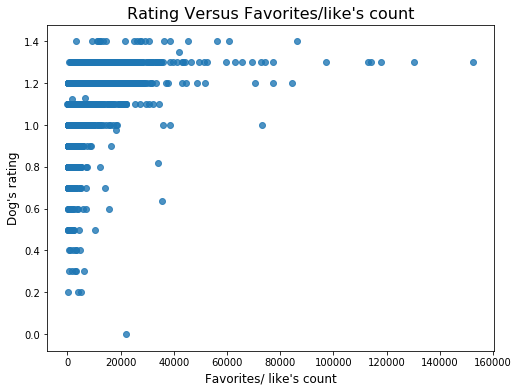

In [83]:
#Visualization on the relationship between Rating and Favorites's count 

fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(x = df.favorites, y = df.rating, alpha = 0.8);

plt.title("Rating Versus Favorites/like's count", fontsize = 16)
plt.xlabel("Favorites/ like's count", fontsize=12)
plt.ylabel("Dog's rating", fontsize=12);

### 2.4 Retweet versus favourites' count
- Correlation between retweet and favourites' counts is high, correlation coefficient around **0.93**.
- They have strong positive correlation.
- This is logical, as more retweets increase the possibilities to reach out to more users.

In [84]:
# Calculate the Pearson's correlation coefficient
df[['favorites','retweet_count']].corr()

,favorites,retweet_count
favorites,1.00000,0.93077
retweet_count,0.93077,1.00000


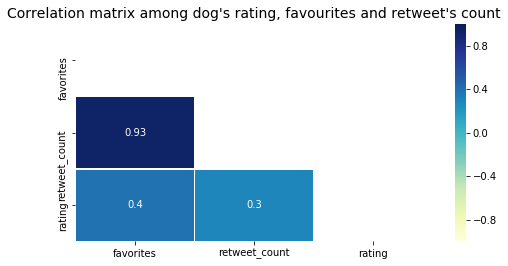

In [85]:
# Get the correlation coefficient on the 3 main numeric variables
data = df[['favorites', 'retweet_count', 'rating']].corr()

# Plot correlation coefficient using heatmap
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (8,4))
ax = sns.heatmap(data, mask = mask, vmax = 1, vmin = -1, annot = True,
                linewidths= .5, cmap = 'YlGnBu')
ax.set_title("Correlation matrix among dog's rating, favourites and retweet's count",
            fontsize=14);
    

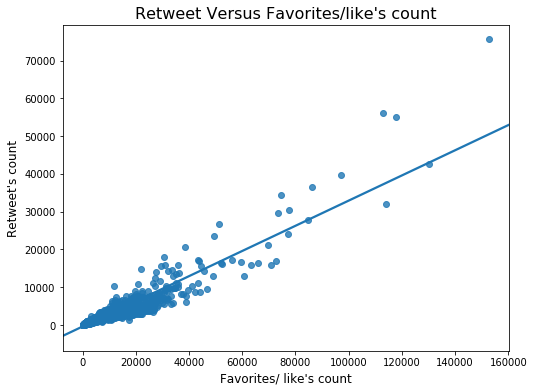

In [86]:
#Visualization on the relationship between Rating and Favorites's count 

fig,ax = plt.subplots(figsize=(8,6))

ax = sns.regplot(x = df.favorites, y = df.retweet_count, data = df,
                 robust = False, ci = None)
    # robust = True, fit a robust regression, which uses a different loss function to 
    # downweight relatively large residuals

ax.set_xlabel("Favorites/ like's count", fontsize=12)
ax.set_ylabel("Retweet's count", fontsize=12)
ax.set_title("Retweet Versus Favorites/like's count", fontsize = 16);

### 2.5 Popular dog's breed
- In total, there are **113** unique dog breed in the tweet data collected.
- Common dog breed is defined by calculating the number of tweet (number of rows) per dog breed, i.e. most common dog breed is with highest number of tweet. **Golden retriever** top the list.
- Popolar dog breed is defined by dog breed that has highest number of favorites count. **Labrado retriever** top the list. 
- Strong positive correlation between common breed and total favorites count, r = 0.96. This is logical, as the cummulative favorites count typically higher due to more tweet of the dog breed. 
- However, there seems no correlation between total favorites count and mean favorites count, r= 0.31. This means, on average, common breed does not earn higher favorites count.

In [87]:
# Unique number of dog breed
df.dog_breed.nunique()

113

list of dog breed, calculated based on:

In [88]:
# total number tweet per dog breed
common_dog_breed = df.groupby('dog_breed')['favorites'].count()
# average favorites count per dog breed
meanfavorites_dog_breed = df.groupby('dog_breed')['favorites'].mean()
# total favorites count per dog breed
totalfavorites_dog_breed = df.groupby('dog_breed')['favorites'].sum()

# save the calculated data in new dataframe
dog_breed = pd.DataFrame(zip(common_dog_breed, meanfavorites_dog_breed, 
                             totalfavorites_dog_breed),
        index = df.groupby('dog_breed')['favorites'].count().index,
        columns =['common_dog_breed',
        'meanfavorites_dog_breed','totalfavorites_dog_breed'])

dog_breed.head()

,common_dog_breed,meanfavorites_dog_breed,totalfavorites_dog_breed
dog_breed,,,
Afghan_hound,3,15438.333333,46315
Airedale,12,4719.750000,56637
American_staffordshire_terrier,15,7551.200000,113268
Appenzeller,2,6549.500000,13099
Australian_terrier,2,9979.500000,19959


Find out the correlation among the calculated field in `dog_breed`

In [89]:
dog_breed.corr()

,common_dog_breed,meanfavorites_dog_breed,totalfavorites_dog_breed
common_dog_breed,1.000000,0.165415,0.963389
meanfavorites_dog_breed,0.165415,1.000000,0.306983
totalfavorites_dog_breed,0.963389,0.306983,1.000000


Visualize the correlation among the calculated `dog_breed`

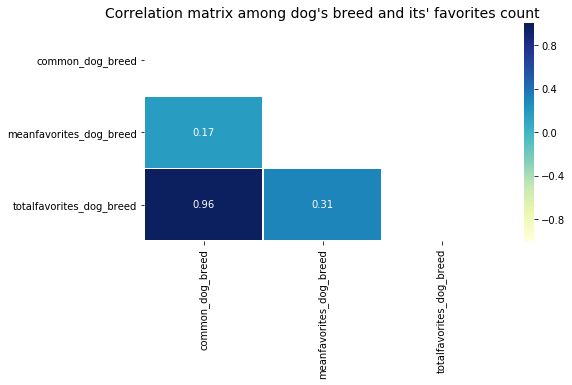

In [90]:
# Plot correlation coefficient using heatmap
data = dog_breed.corr()
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (8,4))
ax = sns.heatmap(data, mask = mask, vmax = 1, vmin = -1, annot = True,
                linewidths= .5, cmap = 'YlGnBu')

ax.set_title("Correlation matrix among dog's breed and its' favorites count",
            fontsize=14);

In [91]:
def plotbarh(data,title, xlabel, ylabel):
    """
    This function plot horizontal bar plot
    Input: data = list of scalars, values,
    title of the chart, 
    xlabel of the char, and ylabel of the chart
    """
    
    ax = data.plot(kind = 'barh', figsize = (8,6), 
                   color = '#86bf91', zorder =2, width = 0.85)
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', 
                   alpha=0.4, color='#eeeeee', zorder=1)

    # set x-axis label
    ax.set_xlabel(xlabel, labelpad=20, size=12);
    # set y-axis label
    ax.set_ylabel(ylabel, labelpad=20, size=12);
    
    # set the title
    ax.set_title(title, weight='bold', size=16);


Visualize the top 10 most commond dog breed

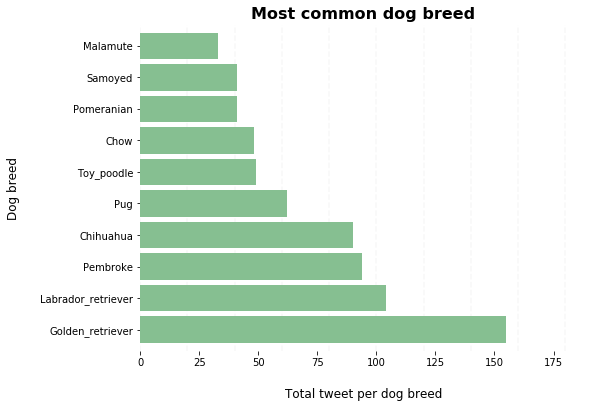

In [92]:
data = df.groupby('dog_breed')['favorites'].count().sort_values(ascending=False)[:10]
title = "Most common dog breed"
xlabel = "Total tweet per dog breed"
ylabel = "Dog breed"
# plot graph using the function `plotbarh(data,title, xlabel, ylabel)`
plotbarh(data,title, xlabel, ylabel)



Visualize the top 10 most dog breed with highest number of favorites count

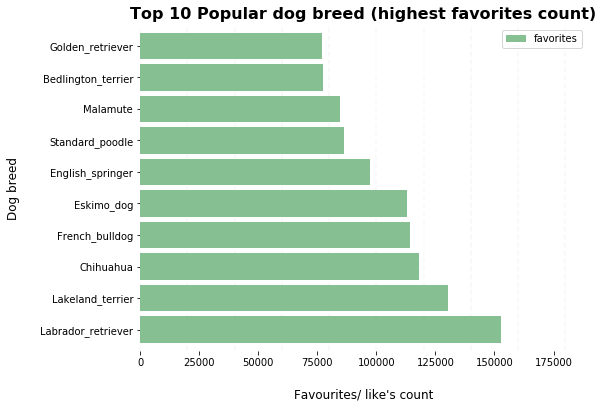

In [93]:
data = df[['dog_breed','favorites']].sort_values(by = 'favorites', \
                ascending= False, ignore_index = True)[:10].set_index('dog_breed')

title = "Top 10 Popular dog breed (highest favorites count)"
xlabel = "Favourites/ like's count"
ylabel = "Dog breed"
# plot graph using the function `plotbarh(data,title, xlabel, ylabel)`
plotbarh(data,title, xlabel, ylabel)

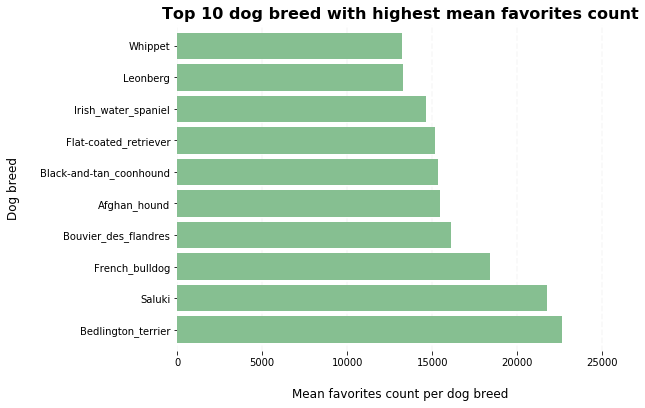

In [94]:
data = df.groupby('dog_breed')['favorites'].mean().sort_values(ascending=False)[:10]
title = "Top 10 dog breed with highest mean favorites count"
xlabel = "Mean favorites count per dog breed"
ylabel = "Dog breed"
# plot graph using the function `plotbarh(data,title, xlabel, ylabel)`
plotbarh(data,title, xlabel, ylabel)

### 2.6 Popular dog's stage
- Popular dog's stage is defined as the highest number of dog stage in the tweet. **Pupper** appeared top the list, comprises of 85%.
- However, majority of the dog stage in the tweet is unknown (~ 85%). This is just a subset information of the tweet gather.

In [95]:
# There is only 15% of the tweet with dog stage information
df.dog_stage.value_counts(normalize = True)

None           0.843788
pupper         0.100724
doggo          0.033776
puppo          0.013269
floofer        0.004825
doggopupper    0.003619
Name: dog_stage, dtype: float64

Visualize the distribution of dog stage appeared in the tweet

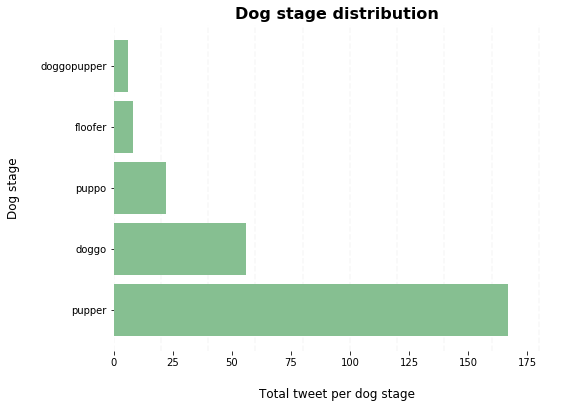

In [96]:
data = df.groupby('dog_stage')['favorites'].count().sort_values(ascending=False)[1:]
title = "Dog stage distribution"
xlabel = "Total tweet per dog stage"
ylabel = "Dog stage"

# plot graph using the function `plotbarh(data,title, xlabel, ylabel)`
plotbarh(data,title, xlabel, ylabel)

### 2.7 Tweet day
- **Monday** appeared to be the day with highest total number of tweet.
- **Wednesday** appeared to be the day with highest mean favorites count.

In [97]:
# Count the number of tweet by day of week
df.tweet_day.value_counts(normalize = True)

Monday       0.168275
Thursday     0.145356
Tuesday      0.145356
Friday       0.142340
Wednesday    0.141737
Sunday       0.133293
Saturday     0.123643
Name: tweet_day, dtype: float64

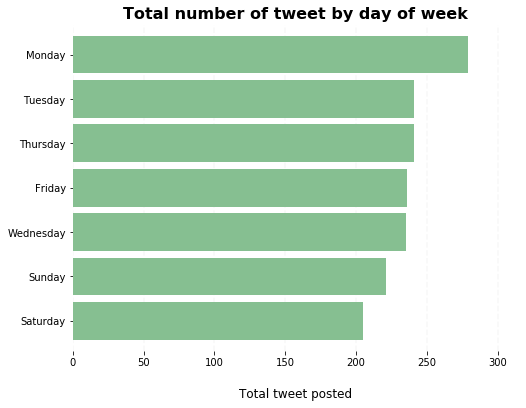

In [98]:
# Visualize the number of tweet by day of week
data = df.groupby('tweet_day')['tweet_id'].count().sort_values(ascending = True)
title = "Total number of tweet by day of week"
xlabel = "Total tweet posted"
ylabel = ""
# plot graph using the function `plotbarh(data,title, xlabel, ylabel)`
plotbarh(data,title, xlabel, ylabel)

Visualize the Average number of tweet by day of week
- **Wednesday** top the list
- **Monday** appeared to be the day with 2nd least average favorites count. This shows, in general, more people post their tweet on Monday, and it takes days to collect the **like** by the audience.

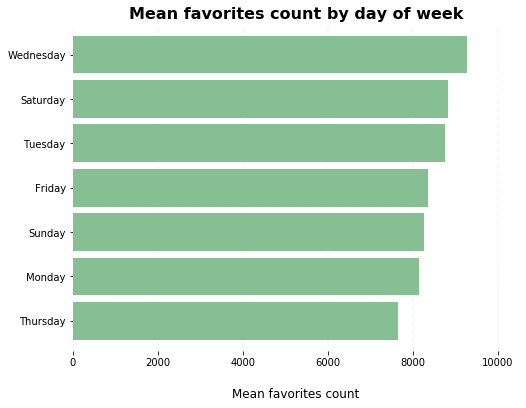

In [99]:
data = df.groupby('tweet_day')['favorites'].mean().sort_values(ascending=True)
title = "Mean favorites count by day of week"
xlabel = "Mean favorites count"
ylabel = ""
# plot graph using the function `plotbarh(data,title, xlabel, ylabel)`
plotbarh(data,title, xlabel, ylabel)

### 2.8 Trend of Rating and favorites count over time
- Rating trend increases over time, with tweet's rating typically > 1
- Favorites count increaes over time as it gain popularity

In [100]:
# create another dataframe by setting the index to date (tweet date)
df_time = df.copy()
df_time = df_time[['timestamp','favorites', 'rating',]]

# rename 'timestamp' column to 'date'
df_time.rename(columns = {'timestamp':'date'}, inplace = True)

# set date to index
df_time.set_index('date', inplace = True)
df_time.sort_index(inplace = True)

Visualize the Trend of rating and favorites count

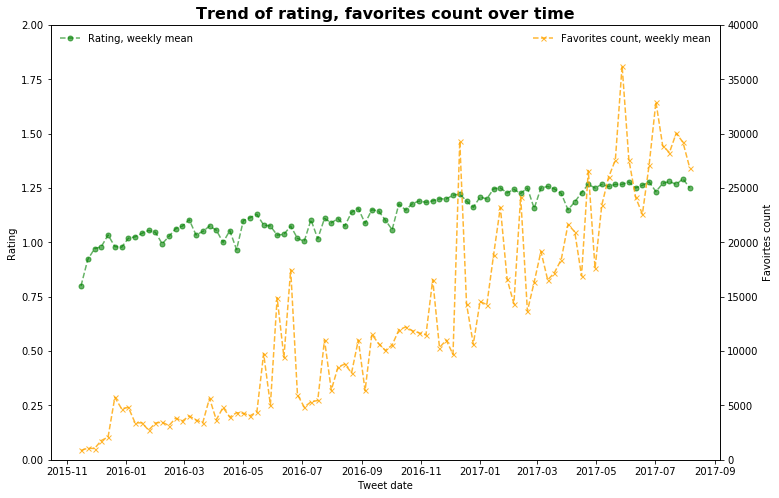

In [101]:
fig, ax = plt.subplots(figsize = (12,8))

# plot the rating trend, using df.resample() group date by week, take weekly mean for rating
ax.plot(df_time['rating'].resample('W').mean(), marker = 'o', markersize = 5,
      linestyle = '--', color = 'g', alpha = 0.6, label = 'Rating, weekly mean')

ax.set_ylabel("Rating")
ax.set_xlabel('Tweet date')
ax.set_ylim(0,2)
ax.legend(loc = 2, frameon = False);

# plot favorites count trend in the same plot
ax2 = ax.twinx()

ax2.plot(df_time['favorites'].resample('W').mean(), marker = 'x', markersize = 5,
      linestyle = '--', color = 'orange', alpha = 0.8, label = 'Favorites count, weekly mean')
ax2.legend(loc = 1, frameon = False)
ax2.set_ylabel("Favoirtes count")
ax2.set_ylim(0,40000)
ax.set_title("Trend of rating, favorites count over time", weight = 'bold', size = 16);

### 2.9 Top rating dog
There are total of 21 tweet with the highest number of dog's rating (1.4). I selected the top rating dog that has the highest favorites count.

In [107]:
# maximum dog's rating
print(f"Max dog's rating:{max(df.rating)}")

print(f"Total number of dog's rating = 1.4: {len(df.query('rating == 1.4'))}")

Max dog's rating:1.4
Total number of dog's rating = 1.4: 21


In [111]:
# Get the row number of dog with rating = 1.4 and highest favorites count
toprate_idx_val = df.query('rating == 1.4').sort_values(
    by = ['favorites'], ascending = False)[:1].index.values[0]

In [113]:
# Display the tweet data on dog with highest rating
df.loc[toprate_idx_val]

tweet_id                                             819004803107983360
timestamp                                     2017-01-11 02:15:36+00:00
source                                               Twitter for iPhone
text                  This is Bo. He was a very good First Doggo. 14...
expanded_urls         https://twitter.com/dog_rates/status/819004803...
rating_numerator                                                     14
rating_denominator                                                   10
name                                                                 Bo
dog_stage                                                         doggo
dog_breed                                               Standard_poodle
favorites                                                         86342
retweet_count                                                     36520
rating                                                              1.4
tweet_day                                                     We

In [114]:
# Text of tweet
df.loc[toprate_idx_val, 'text']

'This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1'

In [116]:
df.loc[toprate_idx_val, 'expanded_urls']

'https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1'

This is the link to the top rate dog: [expanded_urls](https://twitter.com/dog_rates/status/819004803107983360/photo/1)

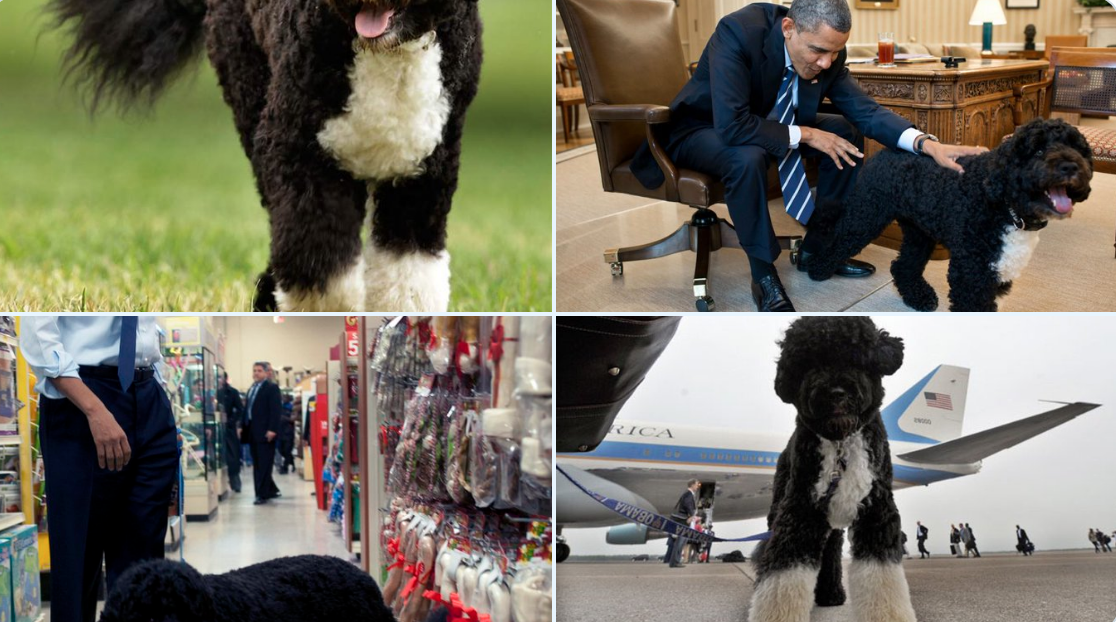

In [117]:
from IPython.display import Image
Image(filename='./photo/top_rate.png')

### 2.10 Most popular dog
- It is Labrador_retriever, a doggo.

In [278]:
# Get the row number of dog that has highest favorites count
popular_idx_val = df.sort_values(by = ['favorites'], ascending = False)[:1].index.values[0]

In [279]:
# Display the tweet with highest favorites count
df.loc[popular_idx_val]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
dog_stage                                                         doggo
dog_breed                                            Labrador_retriever
favorites                                                        152629
retweet_count                                                     75580
rating                                                              1.3
tweet_day                                                      S

In [280]:
#Tweet text
df.loc[popular_idx_val, 'text']

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

This is the link to the most popular doggo: [expanded_urls_video](https://twitter.com/dog_rates/status/744234799360020481/video/1)

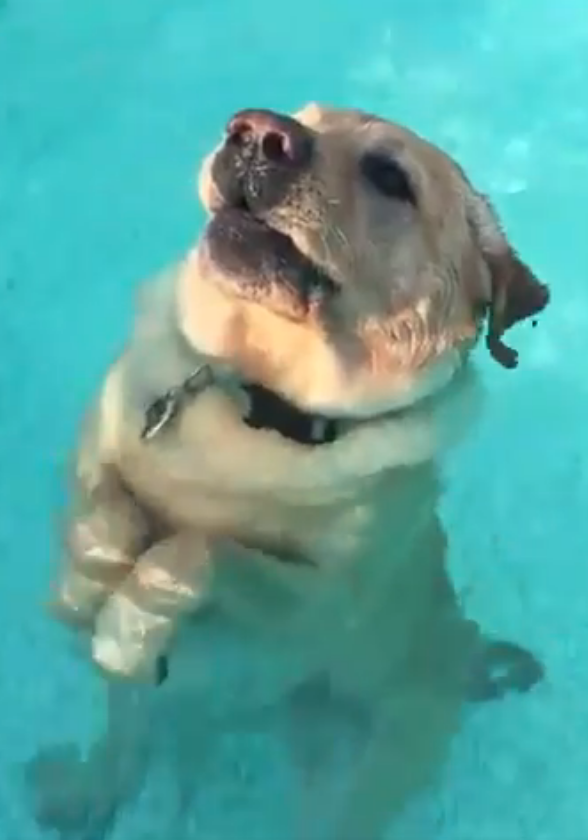

In [281]:
from IPython.display import Image
Image(filename='./photo/popular_doggo.png')

# 3 Summary and conclusion
**Summary**
- Vast majority of user post tweet via their **iphone**.
- Majority of rating is within the range of **1 - 1.2**.
- Weak positive correlation observed between dog's rating and favourites count.
- Strong positive correlation found in favorites count and retweet count, which is not surprising, as normally people retweet the post that they **like**.
- **Golden retriver** is the dog with highest tweet, whereas **Labrado retriever** has the highest favorites count.
- Most posted dog stage goes to **pupper**. 
- Relatively higher user post their tweet on Monday, and Wednesday in general get the highest mean favorites count.
- Rating increases over time, and popularity increases as favorites count increases over time.

I am not able to gather user's data that push the tweet. The JSON data obtained is with only ONE user's ID. Else, it will be interesting to find out information like average tweet per user, any correlation between favorites count and number of followers, number of friends of the user. Any correlation between tweet's favorites count and the user's total favorites count, correlation between tweet's favorites count and number of tweet push by the user.

**Conclusion**   
I would like to conclude by listing down what I have learnt in this project:
- Programmatically download file from html using the `Requests` library.
- Setup up Twitter's Developer account and query twitter data using `Tweepy`.
- Writing and reading Twitter JSON data.
- Data wrangling by gathering data from various sources, assessing data to detect data quality issues and data tidiness issues, and cleaning data. 